<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.875 · Deep Learning · PEC1</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Redes neuronales artificiales

En esta práctica implementaremos redes neuronales artificiales para resolver problemas de:

   - Clasificación
   - Regresión   


**Importante: La entrega debe hacerse en formato notebook y en formato html donde se vea el código y los resultados y comentarios de cada ejercicio. Para exportar el notebook a html puede hacerse desde el menú File $\to$ Download as $\to$ HTML.**

## 0. Contexto y carga de librerías

El siguiente código carga los paquetes necesarios para la práctica y lee el fichero de datos que usaremos.

Los datos contienen información sobre coches de segunda mano, sus características y el precio de re-venta en euros. En un primer ejercicio diseñaremos un modelo que nos permita clasificar los coches en tres grupos según su gama de precio. En el segundo ejercicio diseñaremos un modelo de regresión para predecir el precio de re-venta.

In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import timeit

import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [150]:
import random
import os
import tensorflow as tf

def seed_everything(seed_value):
  os.environ['PYTHONHASHSEED']=str(seed_value)
  random.seed(seed_value)
  np.random.seed(seed_value)
  tf.random.set_seed(seed_value)

THE_SEED = 48
seed_everything(THE_SEED)

In [151]:
##To read directly from Drive in Google Colab use:
from google.colab import drive
drive.mount('/content/drive')
#input path: "./drive/MyDrive/CarPricesData.pkl"

##To read in Kaggle, upload file in Kaggle 
##input path: "/kaggle/input/botnetdl/botnet_dataset_DL.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
df = pd.read_csv("/content/drive/My Drive/dataset.csv") #change path if needed

In [153]:
df.head(5)

,months_old,km,fuel_type,horsepower,metcolor,automatic,size_engine,doors_num,weight,price
0,73,97494,Petrol,110,1,0,1600,5,1085,10950
1,48,89049,Petrol,97,1,0,1400,5,1060,13500
2,40,161000,Diesel,69,1,0,1900,3,1105,13950
3,37,38812,Petrol,97,0,0,1400,3,1025,13450
4,55,33230,Petrol,110,0,0,1600,3,1050,13500


## 1. Exploración (1 punto)



En primer lugar exploraremos el conjunto de datos. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Explora los datos: 

<ul>
        
<li> Indica el tamaño del dataset y el número de variables categóricas y continuas del conjunto de datos</li> 
<li>   Grafica las distribuciones de las variables categóricas y de las continuas</li>
<li>    Genera una tabla de correlaciones de todas las variables usando la librería <code>seaborn</code>, mostrando en cada casilla el valor de la correlación</li>
<li>    Genera una tabla (usando la librería <code>seaborn</code>) que muestre únicamente las correlaciones entre el precio y el resto de variables, ordenada de mayor a menor según los valores de correlación</li>
<li>  Comenta los resultados de la exploración de datos</li>
</ul>

</div>



*   **Variables**



In [154]:
#Dataset size
df.describe

<bound method NDFrame.describe of       months_old      km fuel_type  horsepower  metcolor  automatic  \
0             73   97494    Petrol         110         1          0   
1             48   89049    Petrol          97         1          0   
2             40  161000    Diesel          69         1          0   
3             37   38812    Petrol          97         0          0   
4             55   33230    Petrol         110         0          0   
...          ...     ...       ...         ...       ...        ...   
1431          48   78600    Petrol         110         1          0   
1432          80   86109    Petrol         110         1          0   
1433          77   82103    Petrol          86         1          0   
1434          40   38653    Petrol         110         1          0   
1435          59   43818    Petrol         110         0          0   

      size_engine  doors_num  weight  price  
0            1600          5    1085  10950  
1            1400    

In [155]:
#Number of categorical and continuous variables
num_categorical_variables = 4
num_continuous_variables = 6

*   **Distribuciones**





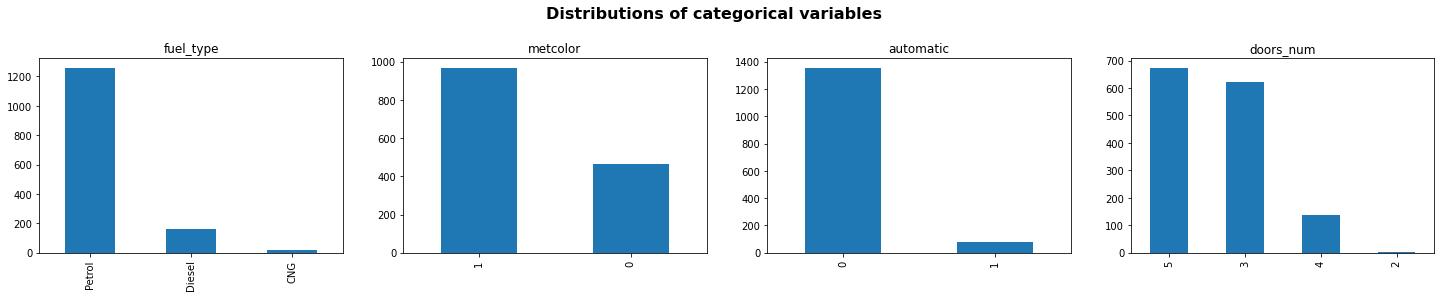

In [156]:
#Distributions of categorical variables
fig, ax = plt.subplots(nrows=1, ncols=num_categorical_variables, figsize=(25,4))

feats_to_explore = ['fuel_type', 'metcolor', 'automatic', 'doors_num']
for i in range(len(feats_to_explore)):
    df[feats_to_explore[i]].value_counts().plot.bar(ax=ax[i])
    ax[i].set_title(feats_to_explore[i])
    
plt.suptitle('Distributions of categorical variables', weight='bold', size=16)
fig.subplots_adjust(top=0.8)
plt.show()


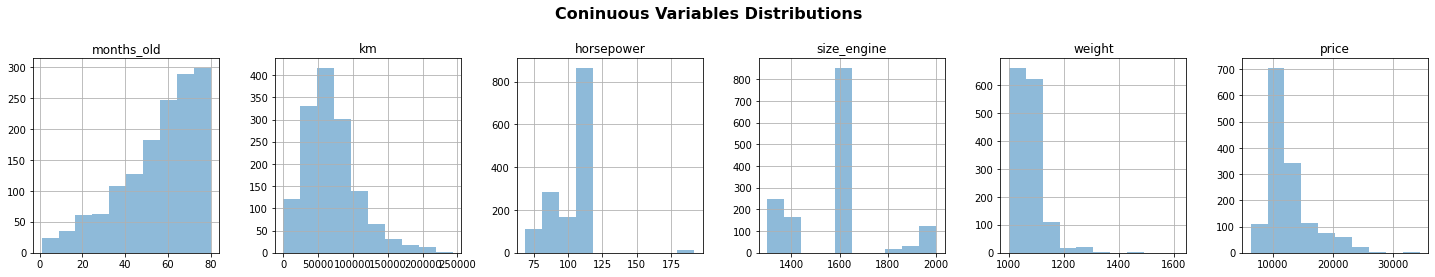

In [157]:
#Distributions continuous variables
fig, ax = plt.subplots(nrows=1, ncols=num_continuous_variables, figsize=(25,4))

feats_to_explore = ['months_old', 'km', 'horsepower', 'size_engine', 'weight', 'price']
for i in range(len(feats_to_explore)):
    df.hist(alpha=0.5, column=feats_to_explore[i], ax=ax[i])
    
plt.suptitle('Coninuous Variables Distributions', weight='bold', size=16)
fig.subplots_adjust(top=0.8)
plt.show()

*   **Correlaciones**




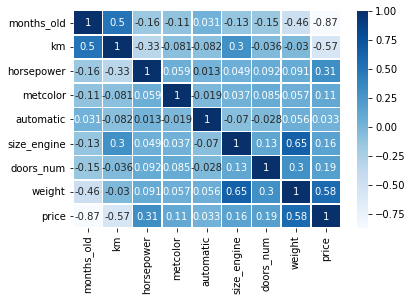

In [158]:
#All variables correlations
corr = df.corr()
ax = sns.heatmap(corr, cmap="Blues", annot=True, linewidths=.5)

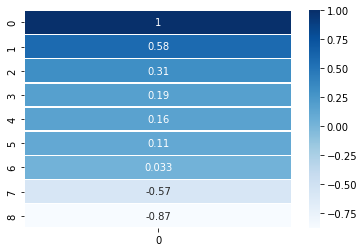

In [159]:
#Features correlating with Price
corr = df.corr()['price'][:]
corr = corr.sort_values(ascending=False)
corr = corr.to_numpy()
ax = sns.heatmap(corr[:, np.newaxis], cmap="Blues", annot=True, linewidths=.5)



*   **Comentarios resultado exploración**



El conjunto de datos es de buena calidad, dispone de una cantidad suficiente de datos y, a primera vista con los gráficos creados, no se ven datos incompletos.

En cuanto a la distribución de los datos, estos no parecen seguir una distribución normal a simple vista, creo que sería necesario comprobarlo; no se esperan outliers en las características, no así del precio, que coches de alta gama o de muy baja, podrían comportarse como *outliers*.

Por otra parte, no hay datos que estén fuertemente correlacionados, tan solo el peso del coche y el tipo de motor tienen una relación razonablemente a estudiar para eliminar dimensiones. Esta correlación es evidente puesto que los motores más grandes son para mover coches más pesados y, los motores más grandes, pesan más.

Nos encontramos ante un conjunto de datos un tanto engañoso en cuanto al tipo de variables, pues, aunque hay cuatro categóricas, solamente una de ellas está en modo texto, mientras que las otras tres son categorías numéricas, indicando valores dicotómicos o, en el caso del números de puertas, categorias de 2 a 5 (ordinales).



## 2. Red neuronal artificial: Clasificación (4.5 puntos)


En este apartado entrenaremos un modelo que intente clasificar los coches según su gama de precio. Para ello crearemos una nueva variable como indicador de calidad del coche (gama baja, media o alta), siguiendo las siguientes condiciones:



*   _low-end_: precio menor que 11000 euros
*   _medium-end_: precio mayor o igual que 11000 euros y menor que 13000
*   _high-end_: precio mayor o igual que 13000



### Pre-procesado


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.75 puntos):</strong> Pre-procesa los datos: 

<ul>
        
<li>   Crea una nueva variable <code>quality</code> que incluya la gama del coche, con las condiciones indicadas</li>
<li>   Muestra el histograma de la nueva variable <code>quality</code></li>
<li>   Crea los vectores de variables dependientes (<i>features</i>) y de la variable independiente (<i>labels</i>)</li>
<li>   Normaliza debidamente los datos y binariza el vector de etiquetas (<i>labels</i>) </li>
<li>   Divide el conjunto de datos en 80% para entrenamiento y 20% para test, usando la función <code>train_test_split</code></li>
<li>   Muestra las dimensiones de los conjuntos de entrenamiento y test</li>
</ul>
</div>

In [160]:
#Create new variable: quality
df['quality'] = pd.cut(df['price'], bins=[0, 11001, 13001, float('Inf')], labels=['low-end', 'medium-end', 'high-end'])
df['quality']

0          low-end
1         high-end
2         high-end
3         high-end
4         high-end
           ...    
1431    medium-end
1432       low-end
1433       low-end
1434      high-end
1435    medium-end
Name: quality, Length: 1436, dtype: category
Categories (3, object): ['low-end' < 'medium-end' < 'high-end']

Text(0.5, 1.0, 'quality')

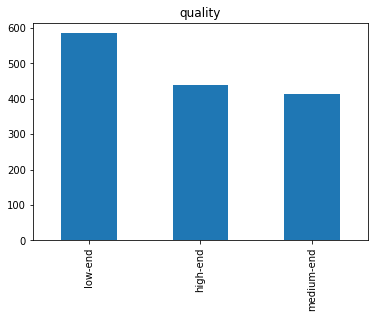

In [161]:
#Histogram car quality
ax = df['quality'].value_counts().plot.bar()
ax.set_title('quality')

In [162]:
df.describe

<bound method NDFrame.describe of       months_old      km fuel_type  horsepower  metcolor  automatic  \
0             73   97494    Petrol         110         1          0   
1             48   89049    Petrol          97         1          0   
2             40  161000    Diesel          69         1          0   
3             37   38812    Petrol          97         0          0   
4             55   33230    Petrol         110         0          0   
...          ...     ...       ...         ...       ...        ...   
1431          48   78600    Petrol         110         1          0   
1432          80   86109    Petrol         110         1          0   
1433          77   82103    Petrol          86         1          0   
1434          40   38653    Petrol         110         1          0   
1435          59   43818    Petrol         110         0          0   

      size_engine  doors_num  weight  price     quality  
0            1600          5    1085  10950     low-end

In [163]:
#Create features and labels vectors
features = df.drop(columns = ['quality', 'price'])
labels = df['quality']

In [164]:
features['fuel_type'] = features['fuel_type'].astype('category').cat.codes
features['fuel_type']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

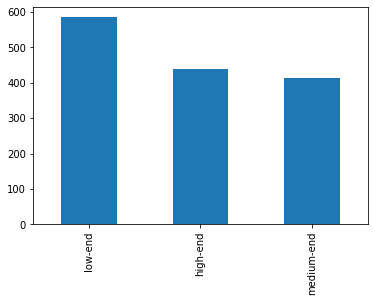

In [165]:
# Check labels distribution
ax = labels.value_counts().plot.bar()

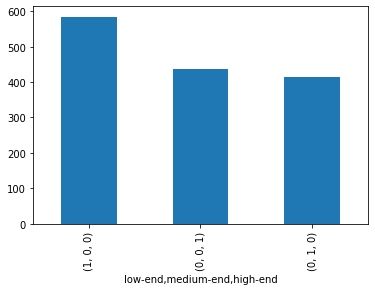

In [166]:
#Binarize the labels
binary_labels = pd.get_dummies(labels)
# Check labels distribution
ax = binary_labels.value_counts().plot.bar()

In [167]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, binary_labels, test_size=0.2, random_state=THE_SEED)

In [168]:
#Shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1148, 9), (288, 9), (1148, 3), (288, 3))

|        | X_train   | X_test    | y_train  | y_test   |
|--------|-----------|-----------|----------|----------|
| Shapes | (1148, 9) | (288, 9)  | (1148, 3)| (288, 3) |

### Modelo base


Empezaremos diseñando un modelo base con 4 capas ocultas.
 
Nota: Para el ajuste del modelo usaremos los datos de test como conjunto de validación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.25 puntos):</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>   Diseña la arquitectura para el modelo de clasificación con la función de activación adecuada para la capa de salida y con las siguientes características:</li>
   <ul>
   <li> 4 capas ocultas con 64, 32, 10, 8 neuronas sucesivamente</li>
   <li> Función de activación de las capas intermedias: ReLU</li>
   </ul>

<li>   Compila el modelo con la función de pérdida más adecuada, el optimizador Adam, una velocidad de aprendizaje de 0.1, y la métrica Accuracy.</li>

<li>   Ajusta el modelo con 20 épocas y un tamaño del batch de 64</li>

<li>   Muestra las gráficas de accuracy y loss. En cada gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
</ul>
</div>

In [169]:
#Create ANN model
model = Sequential()

# Input layer
model.add(keras.Input(shape=(9,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(8, activation="relu"))

# Output layer
model.add(Dense(3, activation="softmax"))

model.build()

In [170]:
model.summary()

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_289 (Dense)           (None, 64)                640       
                                                                 
 dense_290 (Dense)           (None, 32)                2080      
                                                                 
 dense_291 (Dense)           (None, 10)                330       
                                                                 
 dense_292 (Dense)           (None, 8)                 88        
                                                                 
 dense_293 (Dense)           (None, 3)                 27        
                                                                 
Total params: 3,165
Trainable params: 3,165
Non-trainable params: 0
_________________________________________________________________


In [171]:
#Compile
model.compile(Adam(learning_rate=0.1), "categorical_crossentropy", metrics=["accuracy"])

In [172]:
#Fit
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/20
18/18 [==============================] - 1s 14ms/step - loss: 0.8149 - accuracy: 0.5958 - val_loss: 0.5833 - val_accuracy: 0.6840
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.7317 - val_loss: 0.6136 - val_accuracy: 0.7153
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.7413 - val_loss: 0.5598 - val_accuracy: 0.7465
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.7744 - val_loss: 0.5145 - val_accuracy: 0.7639
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0.7683 - val_loss: 0.4671 - val_accuracy: 0.7951
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.7848 - val_loss: 0.5014 - val_accuracy: 0.7743
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7735 - val_loss: 0.4862 - val_accuracy: 0.7812
Epoch 8/20
18/18 [=

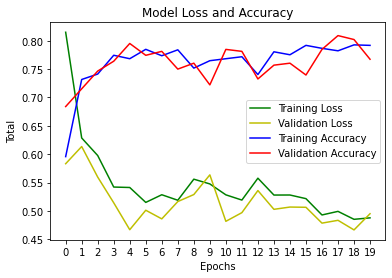

In [173]:
#Plots 
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(0,20)

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')

plt.title('Model Loss and Accuracy')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Total')
plt.legend()
plt.show()

### Influencia velocidad aprendizaje y optimizador

Una vez tenemos el modelo base, analizaremos la influencia que pueden tener la velocidad de aprendizaje y el tipo de optimizador en la mejora del rendimiento.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.5 puntos):</strong> Implementa una función para entrenar la arquitectura del ejercicio anterior para 4 optimizadores diferentes: Adam, SGD, Adadelta, Adagrad, y 4 velocidades de aprendizaje: 0.001, 0.01, 0.05, 0.1. 
Entrena los modelos, y representa dos gráficas:
 <ul>
     <li> Tiempo de entrenamiento vs Velocidad de aprendizaje</li>
     <li>  <i>Accuracy</i> vs Velocidad de aprendizaje</li>
</ul>   
    
Cada gráfica debe incluir la evolución obtenida por los cuatro optimizadores para poderlos comparar mejor.
    
-----------------------------------------------------------------------------------------------------------
<b>Importante</b>: para la entrega de la PEC, fijar el parámetro <code>verbose = 0</code> en el entrenamiento de los modelos. La solución únicamente debe mostrar las gráficas resultantes.
</div>

In [174]:
#Function to compute several models changing Optimizers and learning rate
def compute(model):
  rates = [0.001, 0.01, 0.05, 0.1]
  optimizers = []
  result = []
  for r in range(len(rates)):
    optimizers.append([SGD(learning_rate=rates[r]), "SGD", rates[r]])
    optimizers.append([Adadelta(learning_rate=rates[r]), "Adadelta", rates[r]])
    optimizers.append([Adagrad(learning_rate=rates[r]), "Adagrad", rates[r]])
    optimizers.append([Adam(learning_rate=rates[r]), "Adam", rates[r]])
 
  for i in range(len(optimizers)):
    optimizer = optimizers[i]
    # Not sure if this helps reseting the model
    model.build()
    model.compile(optimizer[0], "categorical_crossentropy", metrics=["accuracy"])
    t0 = timeit.default_timer()
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0,
                        validation_data=(X_test, y_test))
    training_time = timeit.default_timer() - t0
    avg_accuracy = np.mean(history.history['accuracy'])
    #msg = ("Optimizer {model} with learning rate {rate} results:\n\t" \
    #      "{accuracy:.2f}% accuracy and {time:.2f}s training time").format(
    #    model=optimizer[1], rate=optimizer[2], time=training_time, accuracy=avg_accuracy)
    #print(msg)
    result.append([optimizer[1], optimizer[2], training_time, avg_accuracy])
  return result

In [175]:
#Compute models
c = compute(model)

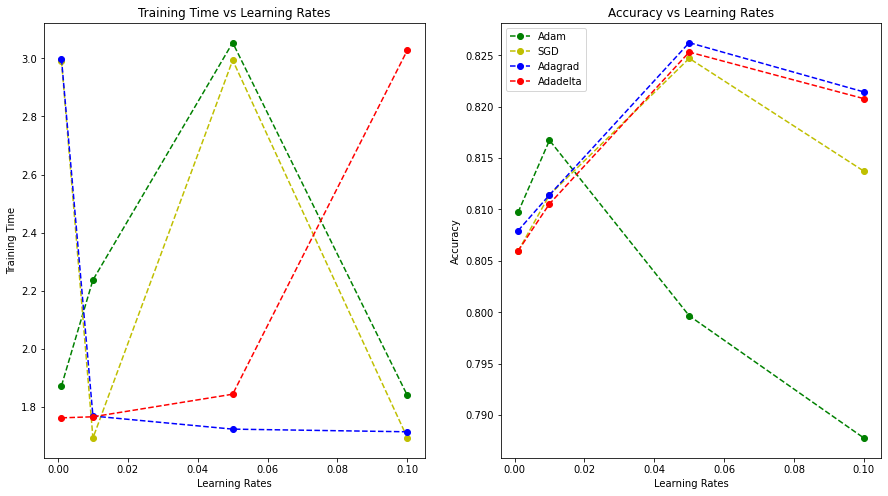

In [176]:
#Plots

# distribuir el resultado en variables más legibles
opts = []
times = []
rates = []
acc = []
for i in range(len(c)):
  m = c[i]
  opts.append(m[0])
  rates.append(m[1])
  times.append(m[2]) 
  acc.append(m[3])

# Variables para las coordenadas de las lineas
adam_rates = []
adam_accuracy = []
adam_times = []
sgd_rates = []
sgd_accuracy = []
sgd_times = []
adagrad_rates = []
adagrad_accuracy = []
adagrad_times = []
adadelta_rates = []
adadelta_accuracy = []
adadelta_times = []

# Transformacion de variables
for i in range(len(times)):
  if opts[i] == 'Adam':
    adam_rates.append(rates[i])
    adam_times.append(times[i])
    adam_accuracy.append(acc[i])
  elif opts[i] == 'SGD':
    sgd_rates.append(rates[i])
    sgd_times.append(times[i])
    sgd_accuracy.append(acc[i])
  elif opts[i] == 'Adagrad':
    adagrad_rates.append(rates[i])
    adagrad_times.append(times[i])
    adagrad_accuracy.append(acc[i])
  elif opts[i] == 'Adadelta':
    adadelta_rates.append(rates[i])
    adadelta_times.append(times[i]) 
    adadelta_accuracy.append(acc[i])

fig, ax = plt.subplots(1,2, figsize=(15,8))

ax[0].plot(adam_rates, adam_times, linestyle='--', marker='o', color='g', label='Adam')
ax[0].plot(sgd_rates, sgd_times, linestyle='--', marker='o', color='y', label='SGD')
ax[0].plot(adagrad_rates, adagrad_times, linestyle='--', marker='o', color='b', label='Adagrad')
ax[0].plot(adadelta_rates, adadelta_times, linestyle='--', marker='o', color='r', label='Adadelta')
ax[0].set_title('Training Time vs Learning Rates')
ax[0].set_xlabel('Learning Rates')
ax[0].set_ylabel('Training Time')

ax[1].plot(adam_rates, adam_accuracy, linestyle='--', marker='o', color='g', label='Adam')
ax[1].plot(sgd_rates, sgd_accuracy, linestyle='--', marker='o', color='y', label='SGD')
ax[1].plot(adagrad_rates, adagrad_accuracy, linestyle='--', marker='o', color='b', label='Adagrad')
ax[1].plot(adadelta_rates, adadelta_accuracy, linestyle='--', marker='o', color='r', label='Adadelta')
ax[1].set_title('Accuracy vs Learning Rates')
ax[1].set_xlabel('Learning Rates')
ax[1].set_ylabel('Accuracy')
plt.legend()
plt.show()

### Elección del mejor modelo

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Identifica el valor de la velocidad de aprendizaje y del optimizador que mejor rendimiento dan al modelo, según los resultados del ejercicio anterior:
<ul>
    
<li>   Justifica la elección</li>
<li>   Compila y entrena el modelo elegido</li>
<li>   Muestra las correspondientes gráficas de <i>Accuracy</i> y <i>Loss</i> de los conjuntos de entrenamiento y validación, e indica el <i>Accuracy</i> del modelo </li>
<li>   Muestra la matriz de confusión multi-clase con las etiquetas originales de <code>quality</code> (<i>low-end</i>, <i>medium-end</i>, <i>high-end</i>)</li>
<li>   Muestra la precisión, recall y F1-score resultantes para cada etiqueta</li>
<li>   Comenta los resultados obtenidos</li>
</ul>
</div>

In [177]:
#Best model justification

En las múltiples ejecuciones del proceso he obtenido varios resultados donde unas veces un modelo y otras otros eran ligeramente mejores al resto.

En general, Adagrad y SGD se han comportado mejor en cuanto a precisión en velocidades de aprendizaje de 0.01 y 0.05, con precisiones alrededor del 84% y tiempos de entrenamiento cercanos al medio segundo.

Mi elección para **el mejor modelo es Adagrad con velocidad de 0.05** dado que, el coste adicional de entranemiento es despreciable frente a casi un 1% más de precisión.

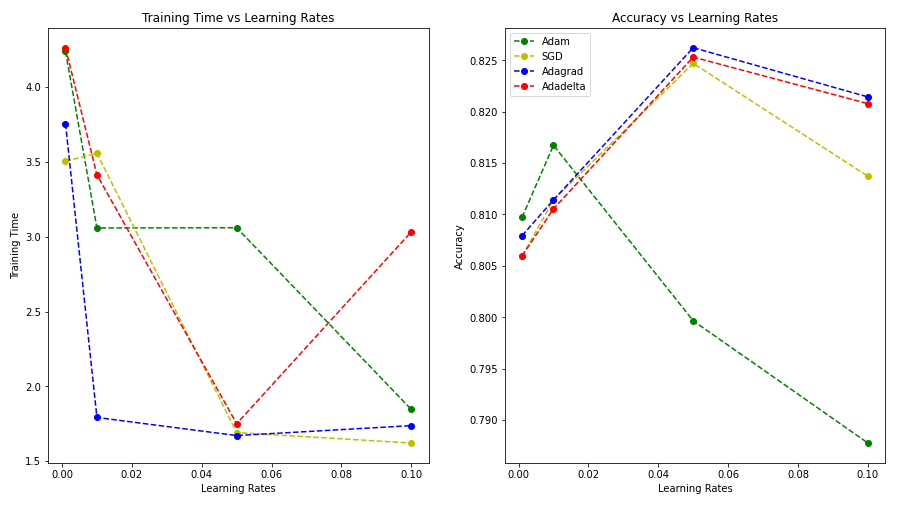

En la imagen, se muestra la ejecución que justifica los comentarios.

In [178]:
#Create, compile and fit ANN BEST model
#Create ANN model
model = Sequential()

# Input layer
model.add(keras.Input(shape=(9,)))

# Hidden layers
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(8, activation="relu"))

# Output layer
model.add(Dense(3, activation="softmax"))

model.build()
model.compile(Adagrad(learning_rate=0.05), "categorical_crossentropy", metrics=["accuracy"])
history_train = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1,
                          validation_data=(X_test, y_test))
results = model.evaluate(X_test, y_test, batch_size=64, verbose=1)

Epoch 1/20
18/18 [==============================] - 1s 13ms/step - loss: 0.9527 - accuracy: 0.5653 - val_loss: 0.7817 - val_accuracy: 0.6562
Epoch 2/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6777 - val_loss: 0.6130 - val_accuracy: 0.6771
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.7361 - val_loss: 0.5342 - val_accuracy: 0.7465
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5349 - accuracy: 0.7648 - val_loss: 0.5055 - val_accuracy: 0.7535
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7787 - val_loss: 0.4940 - val_accuracy: 0.7674
Epoch 6/20
18/18 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.7779 - val_loss: 0.4718 - val_accuracy: 0.7951
Epoch 7/20
18/18 [==============================] - 0s 4ms/step - loss: 0.4916 - accuracy: 0.7866 - val_loss: 0.4766 - val_accuracy: 0.7639
Epoch 8/20
18/18 [=

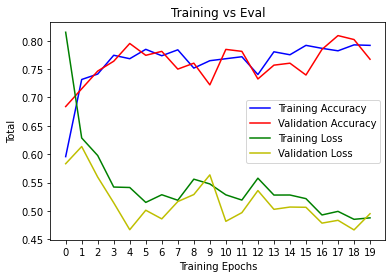

In [179]:
#Plots
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(0,20)

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')


plt.title('Training vs Eval')
plt.xticks(epochs)
plt.xlabel('Training Epochs')
plt.ylabel('Total')
plt.legend()
plt.show()

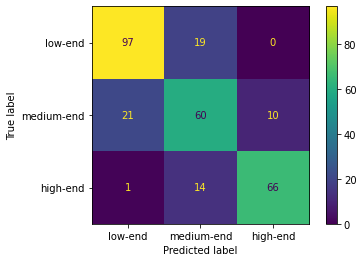

In [180]:
#Confusion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

targets = ['low-end', 'medium-end', 'high-end']
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=targets)
disp.plot()
plt.show()

In [181]:
#Accuracy
print(("Accuracy: {acc:.2f}%").format(acc=results[1] * 100))

Accuracy: 78.12%


In [182]:
#Precision, Recall and F1-score for each label
# Classification Report
targets = ['low-end', 'medium-end', 'high-end']
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names = targets))

              precision    recall  f1-score   support

     low-end       0.82      0.84      0.83       116
  medium-end       0.65      0.66      0.65        91
    high-end       0.87      0.81      0.84        81

    accuracy                           0.77       288
   macro avg       0.78      0.77      0.77       288
weighted avg       0.78      0.77      0.78       288



In [183]:
#Comment results


Los resultados del modelo son bastante pobres, no podríamos fiar al modelo nuestras predicciones pues apenas acierta en 3/4 partes de las pruebas. La matriz de confusión nos muestra que hay dificultades mayores en diferenciar los coches de gama baja y media y que tiene una buena capacidad de diferenciar los de gama alta.

Me llama la atención cómo el proceso de comparativa de modelos suele dar resultados parecidos a pesar de hacer una compilación nueva a cada paso. Debería investigar a fondo para ver si se debe construir el modelo completo para poder resetear el objeto; para el modelo de regresión, haré lo propio como recurso de comparativa. Además, se da el caso de que en la comparativa de modelos, los resultados son buenos (no excelentes) mientras que en la ejecución posterior son los ya comentados, deficientes.

Hemos podido corroborar como una `learning rate` alto, efectivamente como es teórico, ofrece problemas en el aprendizaje, mientras que uno bajo, implica más trabajo de entrenamiento. No he podido comprobar casos de estancamiento por valores bajos y es un tema a tener cuidado en un futuro.

En cuanto a los optimizadores, no comprendo porque Adam, que es un optimizador muy parecido a Adagrad y que es muy utilizado según he podido leer, da resultados tan dispares en mis pruebas.



## 3. Red neuronal artificial: Regresión (4.5 puntos)

En este apartado resolveremos un problema de regresión intentando predecir el precio de re-venta según las características de los coches. Partiremos del conjunto de datos original.

### Pre-procesado




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.5 puntos):</strong> Pre-procesa los datos: 
<ul>
<li>   Crea los vectores de variables dependientes (<i>features</i>) y de la variable independiente (<i>target</i>)</li>
<li>   Normaliza debidamente los datos</li>
<li>   Divide el conjunto de datos en 70% para entrenamiento y 30% para test, usando la función <code>train_test_split</code></li>
<li>   Muestra las dimensiones de los conjuntos de entrenamiento y test</li>
</ul>
</div>

In [184]:
#Create features and target vectors
features = df.drop(columns = ['quality', 'price'])
target = df['price']

In [185]:
#Normalizing the data
features['fuel_type'] = features['fuel_type'].astype('category').cat.codes
features['fuel_type']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

In [186]:
#Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, scaled_target, test_size=0.3, random_state=THE_SEED)

In [187]:
#Dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1005, 9), (431, 9), (1005, 1), (431, 1))

|        | X_train   | X_test     | y_train | y_test  |
|--------|-----------|------------|---------|---------|
| Shapes | (1005, 9) | (431, 9) | (1005,) | (431,) |

### Modelo base

En primer lugar diseñaremos un modelo base con tres capas ocultas.

Nota: Para el ajuste del modelo usaremos los datos de test como conjunto de validación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Implementa el modelo de red neuronal artificial:
<ul>
<li>Diseña la arquitectura para el modelo de regresión con las siguientes características:</li>
    <ul>
   <li>1 primera capa oculta completamente conectada de 128 neuronas y activación ReLU</li>
   <li>2 capas ocultas de 32 y 16 neuronas y activación tangencial</li>
   <li>Todas las capas deben tener <code>kernel_initizalizer</code> en modo 'normal'</li>
   </ul>
<li>Compila el modelo con la función de pérdida más adecuada y el optimizador Adam</li>

<li>Ajusta el modelo con 50 épocas y un tamaño del batch de 32</li>

<li>Muestra la gráfica de pérdida. En la gráfica debe visualizarse la curva de entrenamiento y la de validación</li>
</ul>
</div>

In [188]:
#Create ANN model
model = Sequential()

# Input layer
model.add(keras.Input(shape=(9,)))

# Hidden layers
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="tanh"))

# Output layer
model.add(Dense(1))

model.build()

In [189]:
#Compiling the model
def rmse (y_true, y_pred):
  ''' Evaluates RMSE value, useful for custom metrics on each epoch '''
  return keras.backend.sqrt(
    keras.backend.mean(
      keras.backend.square(y_pred -y_true)))
    
model.compile(Adam(), "mean_absolute_error", metrics=[rmse])

In [190]:
#Fit model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1,
                        validation_data=(X_test, y_test))

results = model.evaluate(X_test, y_test, batch_size=32, verbose=1)

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 0.4197 - rmse: 0.6059 - val_loss: 0.2875 - val_rmse: 0.4186
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2843 - rmse: 0.3918 - val_loss: 0.2631 - val_rmse: 0.3616
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2587 - rmse: 0.3605 - val_loss: 0.2556 - val_rmse: 0.3464
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2491 - rmse: 0.3419 - val_loss: 0.2477 - val_rmse: 0.3366
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2435 - rmse: 0.3289 - val_loss: 0.2528 - val_rmse: 0.3429
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2420 - rmse: 0.3267 - val_loss: 0.2447 - val_rmse: 0.3296
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.2423 - rmse: 0.3228 - val_loss: 0.2388 - val_rmse: 0.3243
Epoch 8/50
32/32 [==============================] - 0s 3ms/step - loss: 0.23

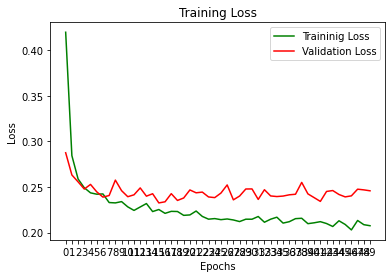

In [191]:
#Plots
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,50)

plt.plot(epochs, loss, 'g', label='Traininig Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training Loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Búsqueda hiperparámetros

Una vez tenemos el modelo base nos interesa buscar la configuración de hiperparámetros que nos proporcione una mejor predicción del precio de re-venta de los coches. En este apartado haremos una búsqueda de hiperparámetros, recorriendo varios valores de número de capas, número de neuronas, tamaño del batch y épocas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1.75 puntos):</strong> Implementa una función que evalúe distintos modelos combinando las siguientes características:
<ul>    
   <li>Tres arquitecturas diferentes con las siguientes configuraciones de número de capas ocultas (completamente conectadas) y número de neuronas en cada capa:</li>
        <ul>
        <li>[128, 64, 16]</li>
        <li>[16, 4]</li>
        <li>[4, 4]</li>
        </ul> 
   <li>Tamaño del batch de 16 y 32</li>
   <li>Épocas de 20, 50 y 100</li>
</ul>   
    
    
Como en el ejercicio anterior, la primera capa oculta tendrá siempre activación ReLU y las demás activación tangencial. El inicializador de kernel estará en modo 'normal' y usaremos el optimizador Adam.

    
La función deberá proporcionar una tabla con los siguientes campos: arquitectura de la red seleccionada, épocas, tamaño del batch, tiempo de entrenamiento, y raíz del error cuadrático medio (RMSE) del modelo 

-----------------------------------------------------------------------------------------------------------
<b>Importante</b>: para la entrega de la PEC, fijar el parámetro <code>verbose = 0</code> en el entrenamiento de los modelos. La solución únicamente debe mostrar la tabla resultante.
</div>

In [192]:
#Hiperparameter search function
def create_arch1_model():
  #Create ANN model
  model = Sequential()

  # Input layer
  model.add(keras.Input(shape=(9,)))

  # Hidden layers
  model.add(Dense(128, kernel_initializer='normal', activation="relu"))
  model.add(Dense(64, kernel_initializer='normal', activation="tanh"))
  model.add(Dense(16, kernel_initializer='normal', activation="tanh"))

  # Output layer
  model.add(Dense(1))

  model.build()
  return model

def create_arch2_model():
  #Create ANN model
  model = Sequential()

  # Input layer
  model.add(keras.Input(shape=(9,)))

  # Hidden layers
  model.add(Dense(4, kernel_initializer='normal', activation="relu"))
  model.add(Dense(4, kernel_initializer='normal', activation="tanh"))

  # Output layer
  model.add(Dense(1))

  model.build()
  return model

def create_arch3_model():
  #Create ANN model
  model = Sequential()

  # Input layer
  model.add(keras.Input(shape=(9,)))

  # Hidden layers
  model.add(Dense(16, kernel_initializer='normal', activation="relu"))
  model.add(Dense(4, kernel_initializer='normal', activation="tanh"))

  # Output layer
  model.add(Dense(1))

  model.build()
  return model

def create_linear_model(i):
  if i == 0:
    model = create_arch1_model()
  elif i == 1:
    model = create_arch2_model()
  else:
    model = create_arch3_model()

  model.compile(Adam(), "mean_absolute_error", metrics=[rmse])
  return ['arch' + str(i+1), model]

def search_regression_hyperparameters():

  # Initialize parameters
  batch_sizes = [16, 32]
  epochs = [20, 50, 100]

  result = []
  for i1 in range(len(epochs)):
    epoch = epochs[i1]
    
    for i2 in range(len(batch_sizes)):
      b_size = batch_sizes[i2]

      for i3 in range(3):
        # Build the model from scratch to avoid 'cached' results
        arch = create_linear_model(i3)
        model = arch[1]
 
        t0 = timeit.default_timer()
        history = model.fit(X_train, y_train, epochs=epoch, batch_size=b_size,
                            validation_data=(X_test, y_test), verbose=0)
        training_time = timeit.default_timer() - t0

        eval = model.evaluate(X_test, y_test, batch_size=b_size, verbose=0)
        result.append([arch[0], epoch, b_size, training_time, eval[1]])

  return result

In [193]:
#Compute search
result = search_regression_hyperparameters()

In [194]:
linear_model_result_df = pd.DataFrame(result, columns=['arch', 'epochs', 'batch_size', 'training_time', 'rmse'])
linear_model_result_df

,arch,epochs,batch_size,training_time,rmse
0,arch1,20,16,5.574408,0.309441
1,arch2,20,16,5.556992,0.353784
2,arch3,20,16,5.541125,0.319938
3,arch1,20,32,3.015417,0.319681
4,arch2,20,32,2.078842,0.326517
5,arch3,20,32,2.971286,0.374479
6,arch1,50,16,10.709570,0.325785
7,arch2,50,16,10.657607,0.316030
8,arch3,50,16,7.665991,0.312766
9,arch1,50,32,5.106520,0.332670


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (0.25 puntos):</strong> Representa en un gráfico el RMSE vs la configuración de los modelos 

</div>

(0.2, 0.5)

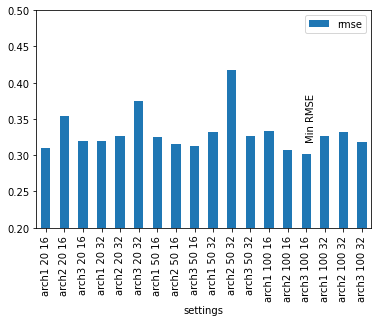

In [195]:
#Plot
def concatenate_settings(x):
  val = x['arch'] + ' ' + str(x['epochs']) + ' ' + str(x['batch_size'])
  return val

linear_model_result_df['settings'] = linear_model_result_df.apply(lambda x: concatenate_settings(x), axis=1)

# Index of min rmse value
min_RMSE_index = linear_model_result_df['rmse'].idxmin()
min_RMSE = linear_model_result_df['rmse'].min()

graph_df = linear_model_result_df.drop(columns = ['arch', 'epochs', 'batch_size', 'training_time'])
ax = graph_df.plot.bar(x = 'settings', y = 'rmse')
ax.text(min_RMSE_index, min_RMSE + 0.02, 'Min RMSE', rotation='vertical')
ax.set_ylim(0.2, 0.5)


### Elección mejor modelo y predicción

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio (1 punto):</strong> Identifica la configuración que proporciona mejores resultados:
<ul> 
<li>Justifica la elección del modelo</li>
<li>Compila y entrena el modelo elegido. Nota: para la entrega, presentar con verbose=0</li>
<li>Muestra la correspondiente gráfica de pérdida de los conjuntos de entrenamiento y validación</li>
<li>Calcula las predicciones del precio y muestra en una tabla el Precio original (<code>price</code>) y el Precio predicho (<code>predicted_price</code>) para las 10 primeras filas del conjunto de test</li>
<li>Comenta los resultados obtenidos</li>
</ul> 
</div>

In [196]:
#Best configuration justification


Los modelos con un `batch_size=16` son prácticamente el doble de lentos que los modelos con `batch_size=32`. En este orden de magnitud, por la cantidad de datos, se podría tolerar un entrenamiento de 20s, pero para un crecimiento de datos podría ser insuficiente.

Por otra parte, tenemos que el mejor `rmse=0.30` así que deberíamos encontrar un modelo con un tamaño de lotes de 32 y un rmse cercano al mejor.
Finalmente, vemos como a mayor cantidad de èpocas, mayor tiempo de entrenamiento y un rmse parecido, por tanto, también buscaría un modelo con un número de épocas bajo, un tamaño de lotes de 32 y el menor rmse posible cercano a 0.30.

Mi **elección** por tanto es:

| arch | epochs | batch size | rmse |
|------|--------|------------|------|
| arch1 | 20 | 32 | 0.325 |

**NOTA**: He considerado tomar en cuenta el tiempo de entrenamiento para la comparativa aunque no se haya hecho gráfica al respecto.

In [197]:
#Create, compile and fit ANN best model
model = create_linear_model(0)[1]
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), verbose=0)
results = model.evaluate(X_test, y_test, batch_size=32, verbose=0)

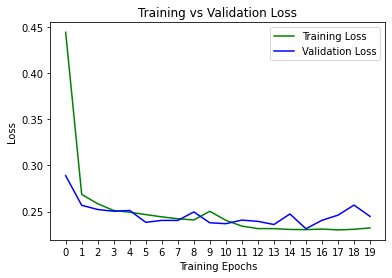

In [198]:
#Plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,20)


plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xticks(epochs)
plt.xlabel('Training Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [199]:
#Generate Predictions on testing data
def prepare_price(a, scaler):
  ''' Prepares price to be shown '''
  p = scaler.inverse_transform(a) 
  return p.flatten()

y_pred = model.predict(X_test)

# Inverse Standarization (to EUR) and prepare data to dataframe column
price = prepare_price(y_test, scaler)
predicted_price = prepare_price(y_pred, scaler)

pred_df = pd.DataFrame()
pred_df['price'] = pd.Series(price)
pred_df['predicted_price'] = pd.Series(predicted_price)
pred_df.head(10)


,price,predicted_price
0,8500.0,8766.754883
1,11250.0,10284.430664
2,11895.0,10941.610352
3,11500.0,11154.433594
4,10200.0,11301.083984
5,12950.0,12016.457031
6,10500.0,9851.264648
7,9250.0,9985.843750
8,12950.0,11280.659180
9,22750.0,19491.492188


In [53]:
#Comment results


Los resultados del modelo, aún siendo eficiente en tiempos de entrenamiento, son un tanto alejados con unos márgenes de error porcentuales de más/menos 15%. Estas variaciones en los precios son altas y poco fiables. Tal vez, debería haber optado por un modelo con menor RMSE a pesar de requerir el doble de tiempo, o habría que buscar otras arquitecturas.

En este caso, la comparativa de modelos la he llevado a cabo recreando los objetos, asegurando a ciencia cierta que los modelos no "arrastraban" información previa y los valores de loss son similares en las ejecuciones individuales; puedo asumir que debería haber hecho el cambio también en el modelo de clasificación para decidir cuál es el mejor modelo. En cualquier caso, pese a que el ejercicio técnico no sea el más preciso, cosa que no se puede permitir en un caso real, es interesante guardar estas reflexiones y hacer un trabajo de verificación.

En este modelo, he utilizado la función de métrica "custom" RMSE, que me permite evaluar el rmse en cada época (aunque las épocas van calculando una media y no el rmse sobre el loss!). Esto da una mejor integración con el modelo (a nivel de código también -más limpio-) y ofrece la métrica en el `evaluate` sin tener que hacer el cálculo posterior sobre la función de pérdida MSE. El pequeño peaje es el cálculo extra que se debe hacer para calcularlo a cada paso.

También trabajar con funciones `lambda` da una potencia a futuras acciones sobre dataframes.